In [1]:
# Ahmad Saleh
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split   
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import metrics

In [2]:
df = pd.read_csv('project_2_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.drop_duplicates(inplace=True)

# Task 1: Is there a statistically significant difference among the different categories of ‘GarageFinish’ in terms of average ‘SalePrice’ amount?



#### Use Parametric test to compare between three groups average
Assume Alpha is 0.05

Parametric assumptions:

1. Normality – Data in each group should be normally distributed.
2. Equal Variance – Data in each group should have approximately equal variance.
3. Independence – The observations in each group are independent of each other and the observations within groups were obtained by a random sample.
4. No Outliers – There should be no extreme outliers.

11    345000
16    149000
34    277500
35    309000
37    153000
Name: SalePrice, dtype: int64
0    208500
1    181500
2    223500
4    250000
6    307000
Name: SalePrice, dtype: int64
3     140000
5     143000
8     129900
10    129500
12    144000
Name: SalePrice, dtype: int64


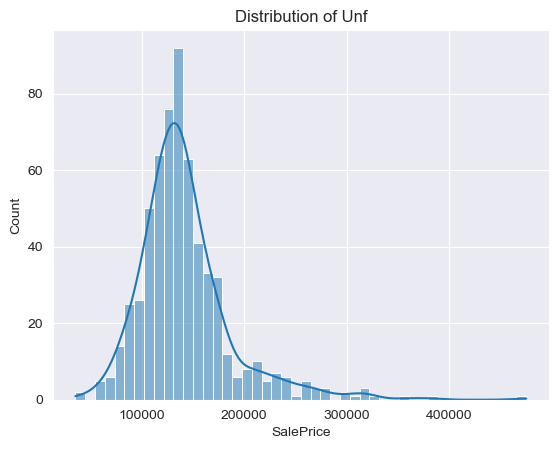

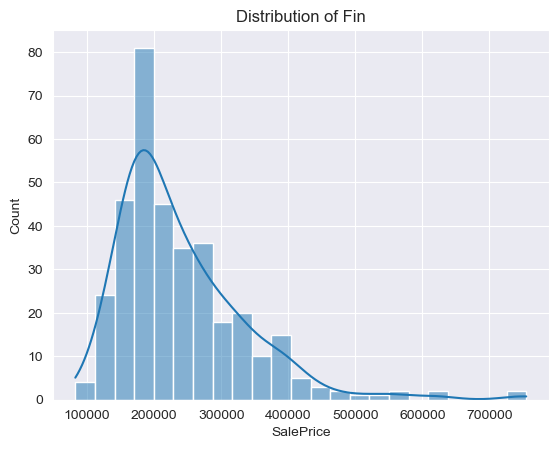

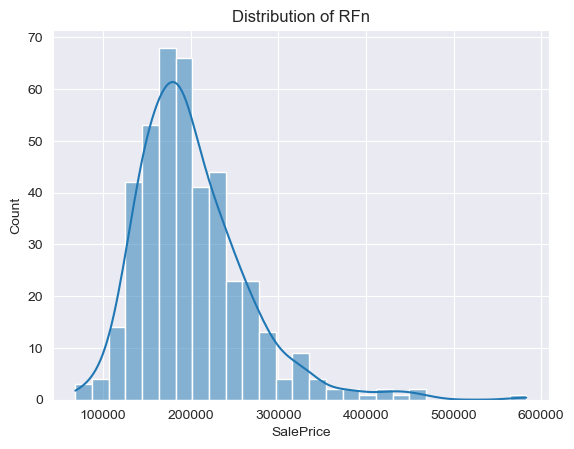

In [5]:
Fin = df[df['GarageFinish']== 'Fin']['SalePrice']
RFn = df[df['GarageFinish']== 'RFn']['SalePrice']
Unf = df[df['GarageFinish']== 'Unf']['SalePrice']

print(Fin.head())
print(RFn.head())
print(Unf.head())


# Plot 2: Distribution for 'Fin'
plt.figure()
sns.histplot(Unf, kde=True)  
plt.title('Distribution of Unf')
plt.show()

# Plot 2: Distribution for 'Fin'
plt.figure()
sns.histplot(Fin, kde=True)
plt.title('Distribution of Fin')
plt.show()

# Plot 3: Distribution for 'RFn'
plt.figure()
sns.histplot(RFn, kde=True)
plt.title('Distribution of RFn')
plt.show()

Since the datasets are right-skewed (non-normal), and parametric tests assume that the data follows a normal distribution, adjustments or transformations may be necessary to meet these assumptions by convert data to normal distribution

We will normalize the three groups.

alpha = 0.05

Null hypothesis (H₀): The median SalePrice is the same across all three GarageFinish categories.

Alternative Hypothesis (H₁): At least one of the GarageFinish categories has a different median SalePrice.

p-value < alpha: Reject null hypothesis (H₀) (evidence supports the alternative hypothesis).

p-value > alpha: Fail to reject null hypothesis (H₀) h (not enough evidence to support the alternative hypothesis).

In [6]:
# preprocessing 
scaler = MinMaxScaler()

Fin_normalized = scaler.fit_transform(Fin.values.reshape(-1, 1))
RFn_normalized = scaler.fit_transform(RFn.values.reshape(-1, 1))
Unf_normalized = scaler.fit_transform(Unf.values.reshape(-1, 1))

alpha = 0.05


Null hypothesis (H₀): The median SalePrice is the same across all three GarageFinish categories.

Alternative Hypothesis (H₁): At least one of the GarageFinish categories has a different median SalePrice.

p-value < alpha: Reject null hypothesis (H₀) (evidence supports the alternative hypothesis).

p-value > alpha: Fail to reject null hypothesis (H₀) h (not enough evidence to support the alternative hypothesis).

In [7]:
# Computing p-value using anova test

result = f_oneway(Fin_normalized, RFn_normalized, Unf_normalized)

(result)

F_onewayResult(statistic=array([4.50340836]), pvalue=array([0.01123486]))

p-value = 0.011

Since p-value < alpha => reject the null hypothesis which means there is a significant difference in the SalePrice average between the GarageFinish categories.


In [380]:
# using post-hoc to determine specific differences between groups.
tukey_results = pairwise_tukeyhsd(np.concatenate([Fin_normalized, RFn_normalized, Unf_normalized]),
                                  np.concatenate([['Fin'] * len(Fin_normalized), ['RFn'] * len(RFn_normalized), ['Unf'] * len(Unf_normalized)]))

print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   Fin    RFn   0.0255 0.0107  0.0049 0.0462   True
   Fin    Unf   0.0087 0.5349 -0.0105 0.0279  False
   RFn    Unf  -0.0168 0.0768 -0.0349 0.0014  False
---------------------------------------------------


Fin vs RFn: p-adj equals 0.0107 and higher than 0.05 indicates a statistically significant difference between the Fin and RFn groups.

Fin vs Unf: p-adj equals 0.5349 and higher than 0.05 indicating no statistically significant difference between the Fin and Unf groups, confidence interval includes 0, which means the difference between these groups is not significant.

RFn vs Unf: p-adj equals 0.0768 and higher than 0.05 indicating no statistically significant difference between the Fin and Unf groups, confidence interval includes 0, which means the difference between these groups is not significant.

# Task 2: Training a multiple linear regression model to predict ‘SalePrice’.

In [381]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [382]:
df = pd.read_csv('project_2_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

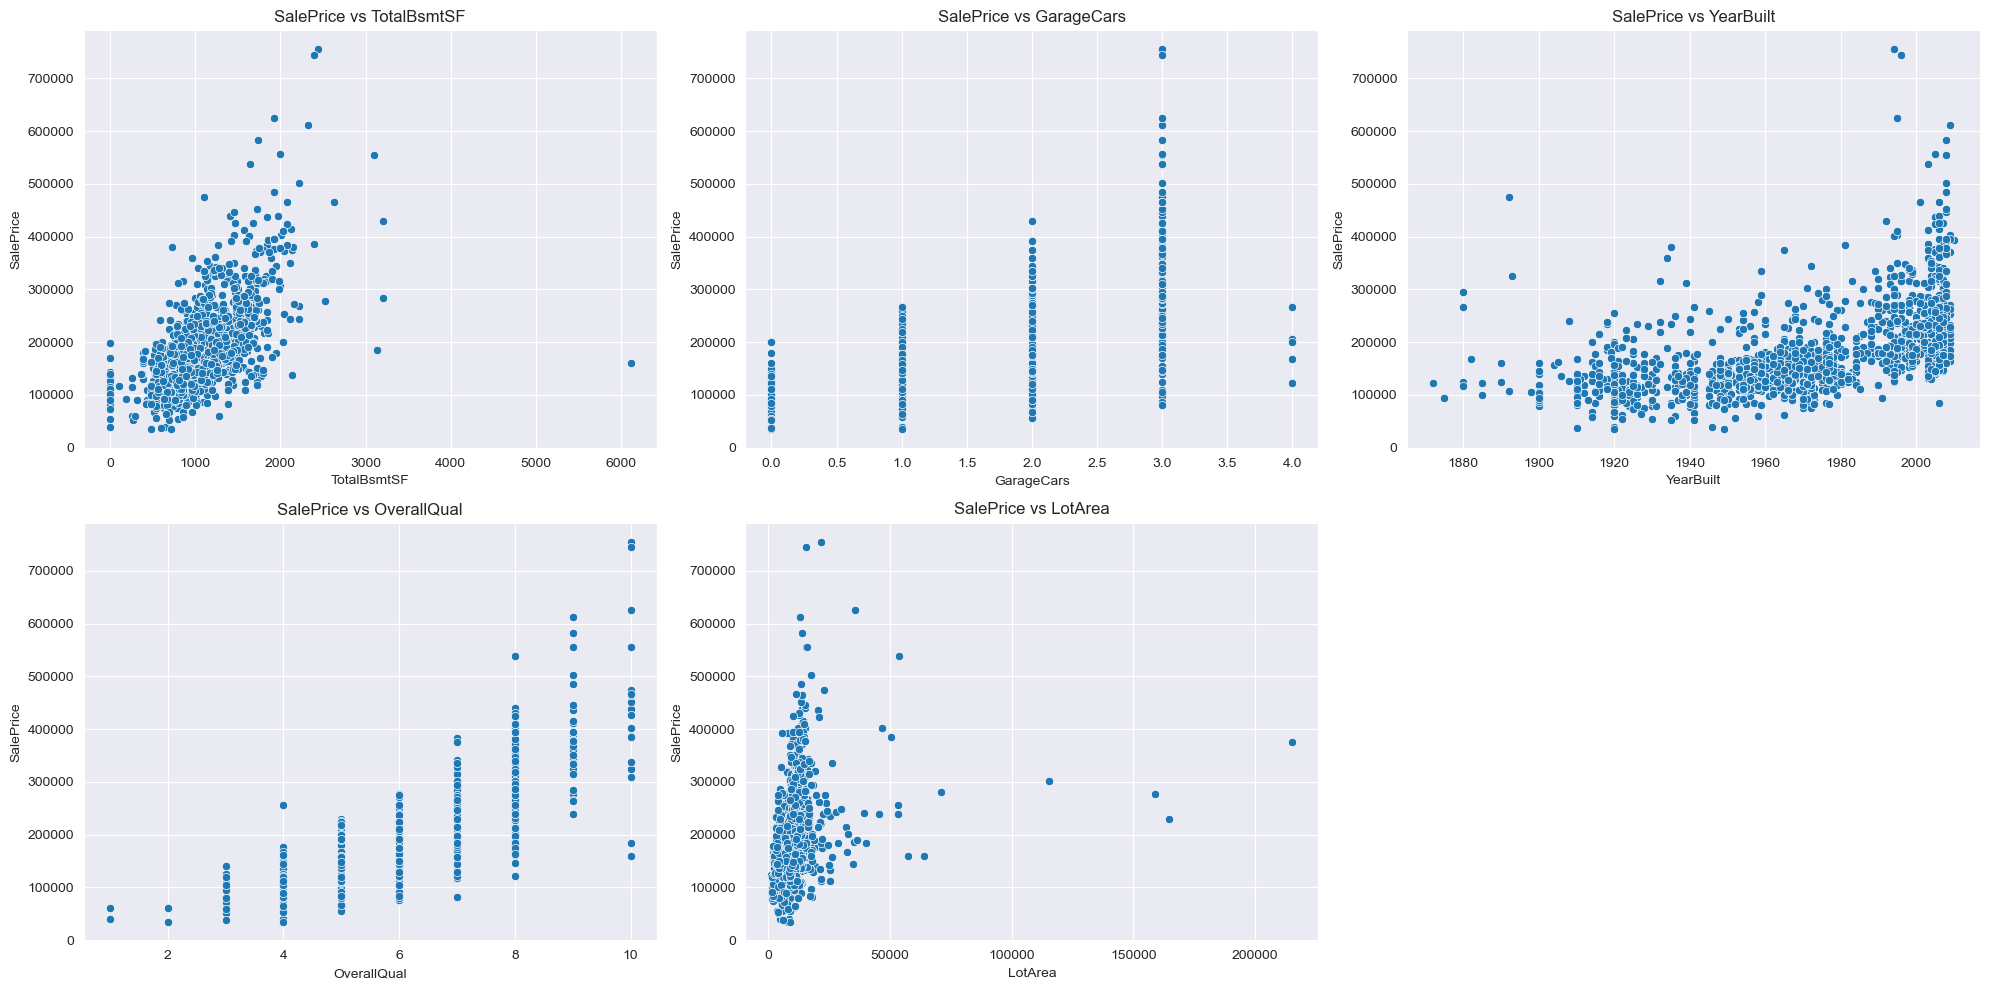

In [383]:
features = ['TotalBsmtSF', 'GarageCars', 'YearBuilt', 'OverallQual', 'LotArea']


plt.figure(figsize=(20, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns
    sns.scatterplot(x=df[feature], y=df['SalePrice'])
    plt.title(f'SalePrice vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.savefig('plot.png')
plt.show()

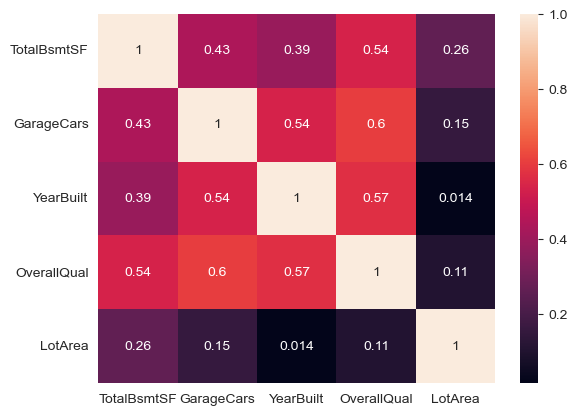

In [384]:
selected_columns = ['TotalBsmtSF', 'GarageCars', 'YearBuilt', 'OverallQual', 'LotArea']

corr_matrix = df[selected_columns].corr()


sns.heatmap(corr_matrix, annot=True)
plt.savefig('corr_matrix.png')

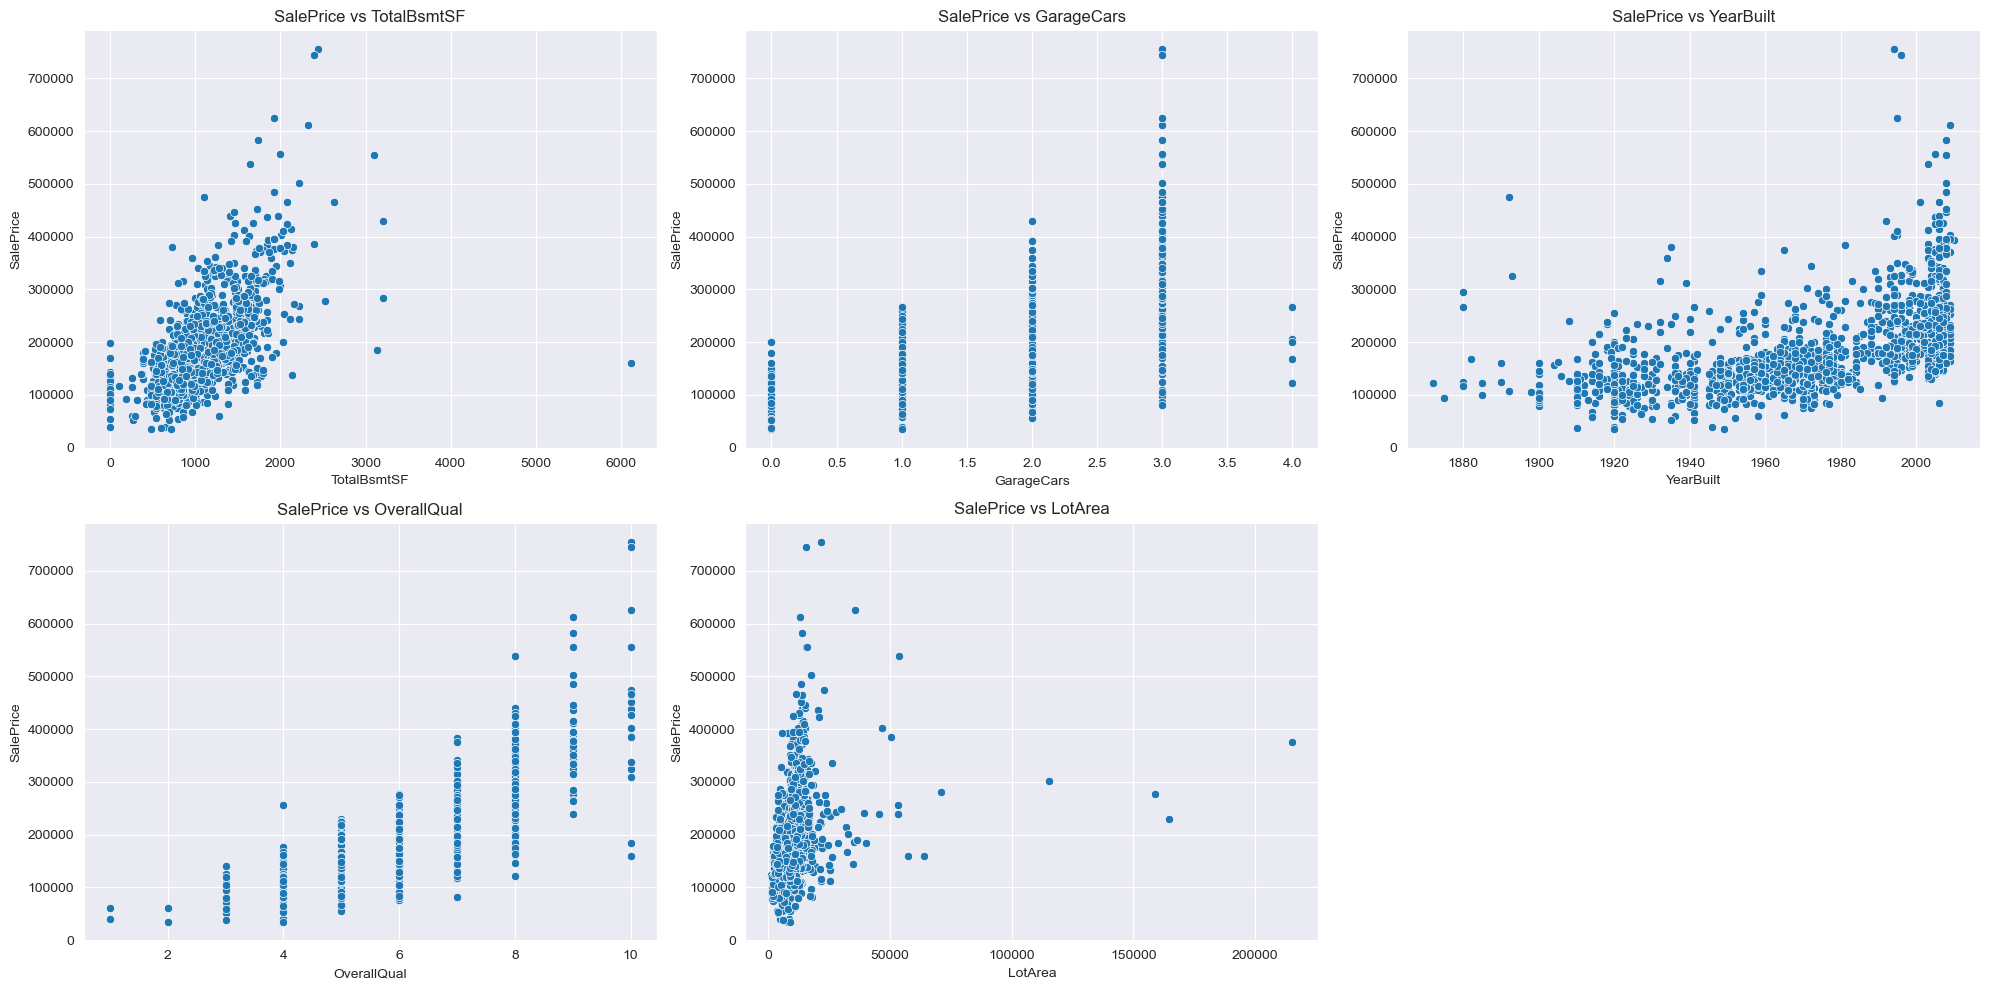

In [385]:
features = ['TotalBsmtSF', 'GarageCars', 'YearBuilt', 'OverallQual', 'LotArea']

plt.figure(figsize=(20, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns
    sns.scatterplot(x=df[feature], y=df['SalePrice'])
    plt.title(f'SalePrice vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

In [386]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
features = ['LotArea', 'OverallQual', 'YearBuilt', 'GarageCars', 'TotalBsmtSF']

In [387]:
X = df[features]
y = df['SalePrice']
 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [388]:
model = LinearRegression()
model.fit(x_train, y_train)

print("a = ", model.coef_, 'b = ', model.intercept_)

a =  [9.61389183e-01 3.02981020e+04 9.41357996e+01 2.20004501e+04
 3.01001820e+01] b =  -271003.1476620203


Mean Squared Error: 2048685652.9988344
Mean Absolute Error: 28174.866229487077
R-squared: 0.7329076237879938


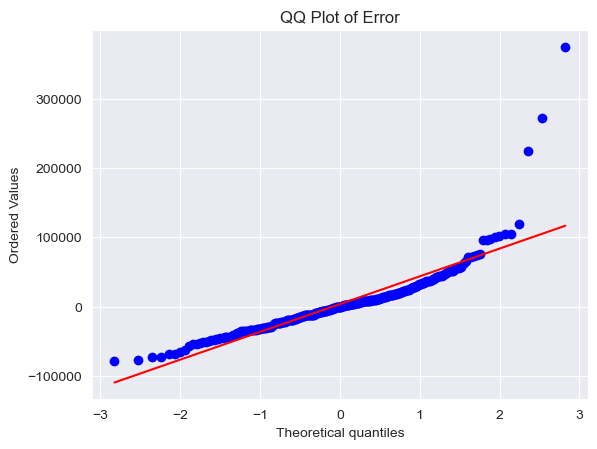

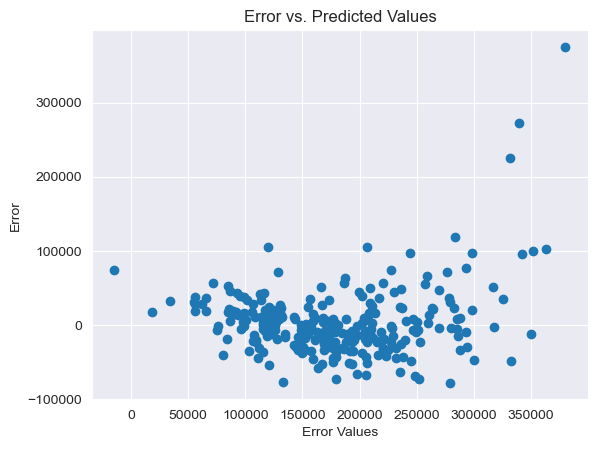

In [389]:
y_pred = model.predict(x_test)
error = y_test - y_pred
mse = mean_squared_error(y_test, y_pred)
mae = np.mean(np.absolute(error))
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)
error_df = pd.DataFrame({'Error': error})

# Checking normality
import scipy.stats as stats
stats.probplot(error, plot=plt)
plt.title('QQ Plot of Error')
plt.show()

# Check for homoscedasticity
plt.scatter(y_pred, error)
plt.xlabel('Error Values')
plt.ylabel('Error')
plt.show()